## Read in country data and use K-Means to group countries together. How many clusters did you find to be best?

In [28]:
import pandas as pd
df = pd.read_csv("country_profile_variables.csv")
df = df.set_index(["country", "Region"])
df = df.apply(pd.to_numeric, errors="coerce")
df = df.fillna(0)

In [29]:
df.head()

,,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
country,Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,SouthernAsia,652864.0,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,...,8.3,42,2.1,0.0,63,5,0.0,0.0,21.43,-99
Albania,SouthernEurope,28748.0,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,...,63.3,130,28.2,0.0,84,36,0.0,0.0,2.96,-99
Algeria,NorthernAfrica,2381741.0,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,...,38.2,135,0.8,0.0,5900,55,0.0,0.0,0.05,-99
American Samoa,Polynesia,199.0,56,278.2,103.6,-99,-99.0,-99.0,-99.0,-99.0,-99.0,...,-99.0,92,87.9,-99.0,-99,-99,0.0,0.0,-99.00,-99
Andorra,SouthernEurope,468.0,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,...,96.9,13,34.0,0.0,1,119,0.0,0.0,-99.00,-99


In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=10,
                random_state=765,
                n_init=20).fit(df)


In [32]:
df["cluster_label"] = kmeans.labels_

In [25]:
df["cluster_label"].value_counts()

,count
cluster_label,
0,167
7,30
8,11
4,10
6,4
3,3
1,1
9,1
2,1


In [19]:
sse = []
for k in range(1, 25):
    print(k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [21]:
import matplotlib.pyplot as plt

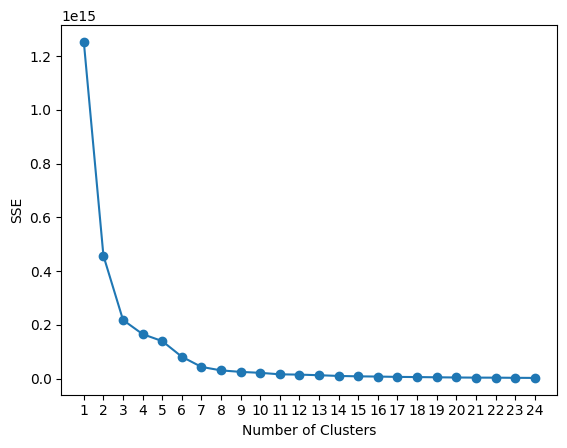

In [22]:
plt.plot(range(1, 25), sse, marker='o')
plt.xticks(range(1, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [27]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),cluster_label
0,Afghanistan,SouthernAsia,652864.0,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,42,2.1,0.0,63,5,0.0,0.0,21.43,-99,7
1,Albania,SouthernEurope,28748.0,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,130,28.2,0.0,84,36,0.0,0.0,2.96,-99,0
2,Algeria,NorthernAfrica,2381741.0,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,135,0.8,0.0,5900,55,0.0,0.0,0.05,-99,4
3,American Samoa,Polynesia,199.0,56,278.2,103.6,-99,-99.0,-99.0,-99.0,...,92,87.9,-99.0,-99,-99,0.0,0.0,-99.00,-99,0
4,Andorra,SouthernEurope,468.0,77,163.8,102.3,2812,0.8,39896.4,0.5,...,13,34.0,0.0,1,119,0.0,0.0,-99.00,-99,0


In [33]:
_ = df.reset_index()

In [35]:
_.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),cluster_label
0,Afghanistan,SouthernAsia,652864.0,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,42,2.1,0.0,63,5,0.0,0.0,21.43,-99,7
1,Albania,SouthernEurope,28748.0,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,130,28.2,0.0,84,36,0.0,0.0,2.96,-99,0
2,Algeria,NorthernAfrica,2381741.0,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,135,0.8,0.0,5900,55,0.0,0.0,0.05,-99,4
3,American Samoa,Polynesia,199.0,56,278.2,103.6,-99,-99.0,-99.0,-99.0,...,92,87.9,-99.0,-99,-99,0.0,0.0,-99.00,-99,0
4,Andorra,SouthernEurope,468.0,77,163.8,102.3,2812,0.8,39896.4,0.5,...,13,34.0,0.0,1,119,0.0,0.0,-99.00,-99,0


In [39]:
__ = _.pivot_table(index="Region", columns="cluster_label", values="country", aggfunc='count').fillna(0)
__#.div(__.sum(axis=1), axis=0)


cluster_label,0,1,2,3,4,5,6,7,8,9
Region,,,,,,,,,,
Caribbean,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CentralAmerica,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
CentralAsia,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
EasternAfrica,11.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
EasternAsia,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0
EasternEurope,7.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Melanesia,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Micronesia,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MiddleAfrica,5.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0


## Use PCA to reduce dimensions, re-cluster.